# 0001 - Linear Regression Model

# I. Abstract
This notebook is all about create a linear regression model.
- First part, setup a random equation y=a.x + b and detach it's outputs
- Second part, setup model and trying to figure it own weight and bias.

# II. Setup data for training.

In [80]:
import torch
import torch.nn as nn

In [81]:
class DefinedLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.tensor(1.5, requires_grad=False)
        self.bias = torch.tensor(2.75, requires_grad=False)
        
    def forward(self, input):
        output = self.weight * input + self.bias
        return output

In [82]:
x_input_list = torch.linspace(start=0, end=100, steps=3000)
#print(f"x_input_list: {x_input_list}")

In [83]:
definedLinearRegressionModel = DefinedLinearRegressionModel()

In [84]:
y_output_list = definedLinearRegressionModel(x_input_list)

In [85]:
input_length = list(x_input_list.size())[0]
y_output_noise_list = torch.randint(low=-30,high=30, size=(input_length,)) + y_output_list

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Linear Regression Dataset')

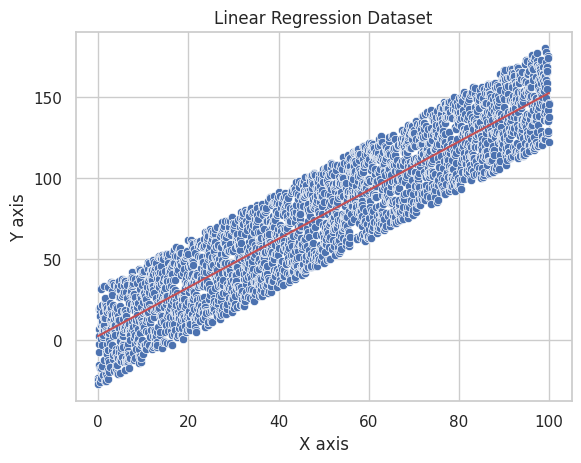

In [87]:
sns.set(style='whitegrid')
sns.lineplot(x=x_input_list, y= y_output_list, color='r')
sns.scatterplot(x=x_input_list, y=y_output_noise_list)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("Linear Regression Dataset")

# III. Setup an empty model for training

In [88]:
class TrainModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.tensor(1.5, requires_grad=False)
        self.bias = nn.Parameter(torch.tensor(-100.0, requires_grad=True))
    
    def forward(self, input):
        output = self.weight * input + self.bias
        return output

In [89]:
train_model = TrainModel()

In [90]:
from torch.optim import SGD

In [91]:
optimizer = SGD(params = train_model.parameters(), lr=0.00001)

In [92]:
print(f"Epoch -1: Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")

Epoch -1: Linear Regression: y=1.5.x + -100.0


In [93]:
def add_prefix_zero(number, zero_count):
    return "{0:0{1}d}".format(number, zero_count)

In [94]:
def draw_plot(model, epoch="Unknown"):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(y_output_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")

In [95]:
def save_plot(model, epoch):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(y_output_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")
    
    file_name = f"model_{add_prefix_zero(epoch, 4)}.png"
    plt.savefig(f"../images/0001/{file_name}")

In [96]:
best_total_loss = float('inf')
for epoch in range(100):
    #print(f"Starting Epoch {epoch}")
    total_loss = 0.0
    
    for i in range(len(x_input_list)):
        input = x_input_list[i]
        real_output = y_output_list[i]
        
        model_output = train_model(input)
        loss = (model_output - real_output) ** 2
        loss.backward()
        total_loss = total_loss + float(loss)
        #print(f"Epoch {epoch}, i: {i}, loss: {loss}, total_loss: {total_loss}")
    
    if total_loss < best_total_loss:
        best_total_loss = best_total_loss
        optimizer.step()
        optimizer.zero_grad()
        #print(f"After Epoch {epoch}, total_loss: {total_loss}")
        #print(f"After Epoch {epoch}: Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")
        save_plot(train_model, epoch)
    else:
        #print(f"After Epoch {epoch}, total_loss: {total_loss} greater than the best_total_loss {best_total_lost}.")
        #print("Stop Training.")
        break;

<Figure size 640x480 with 0 Axes>

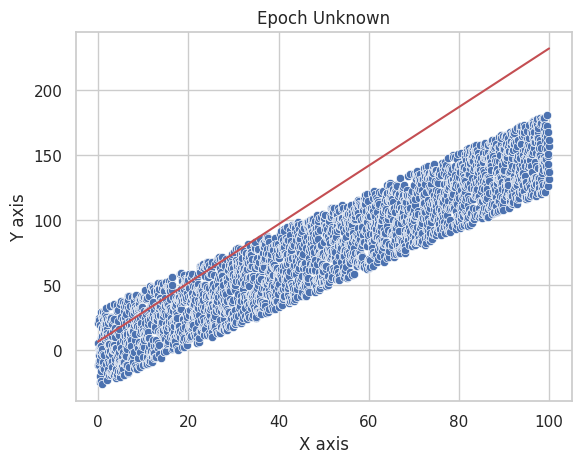

In [79]:
draw_plot(train_model)

<Figure size 640x480 with 0 Axes>